# Introducción a PyTorch

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/4-Vision-DL/4-1-Intro-PyTorch.ipynb)

Pytorch es una librería de redes neuronales con características como diferenciación automática, grafos computacionales, algoritmos y primitivas de redes neuronales con abstracciones de alto nivel y soporte para GPUs.

In [1]:
import numpy as np
import torch
#import math

## 1.&nbsp;Tensores

Los tensores son una estructura de datos similar a los arreglos y matrices pero con más dimensiones. En PyTorch, se utiliza tensores para codificar las entradas y salidas de un modelo, así como los parámetros del modelo. Los tensores son similares a los `ndarrays` de NumPy, con la excepción que los tensores pueden ejecutarse en GPU u otros aceleradores de hardware.

### 1.1. Inicialización de un tensor

In [10]:
# Creación de un tensor directamente de los datos
t1 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("t1:\n", t1)

# Creación de un tensor de ceros
t2 = torch.zeros(2, 2)
print("t2:\n", t2)

# Creación de un tensor de unos
t3 = torch.ones(2, 2)
print("t3:\n", t3)

# Creación de un tensor aleatorio
t4 = torch.rand(2, 2)
print("t4:\n", t4)

# Creación de un tensor a partir de un arreglo de NumPy
np_array = np.array([1,2,3])
t_np = torch.from_numpy(np_array)
print("t_np:\n", t_np)

t1:
 tensor([[1., 2.],
        [3., 4.]])
t2:
 tensor([[0., 0.],
        [0., 0.]])
t3:
 tensor([[1., 1.],
        [1., 1.]])
t4:
 tensor([[0.8830, 0.7381],
        [0.0743, 0.7046]])
t_np:
 tensor([1, 2, 3])


### 1.2. Atributos de un tensor


In [11]:
tensor = torch.tensor([[1, 2, 3], [3, 4, 5]])

print(f"Dimensiones del tensor: {tensor.shape}")
print(f"Tipo de datos del tensor: {tensor.dtype}")
print(f"El tensor se almacena en: {tensor.device}")

Dimensiones del tensor: torch.Size([2, 3])
Tipo de datos del tensor: torch.int64
El tensor se almacena en: cpu


### 1.3. Operaciones con tensores



In [12]:
# Mover el tensor a la GPU, si está disponible
if torch.cuda.is_available():
  tensor = tensor.to("cuda")

# Indexación y slicing de forma similar a NumPy
tensor = torch.tensor([[1,2,3], [30,40,50]])
print("Primera fila: ", tensor[0])
print("Primera columna: ", tensor[:,0])

Primera fila:  tensor([1, 2, 3])
Primera columna:  tensor([ 1, 30])


In [14]:
# Multiplicación matricial
t = torch.ones(3, 3)
t1 = t @ t.T
t2 = t.matmul(t.T)

print("t1:\n", t1)
print("t2:\n", t2)

t1:
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
t2:
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


In [15]:
# Producto término a término
t1 = t * t
t2 = t.mul(t)
print("t1:\n", t1)
print("t2:\n", t2)

t1:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t2:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [18]:
# Funciones comunes
t1 = torch.rand(2, 4)*2 - 1

print(torch.abs(t1))
print(torch.ceil(t1))
print(torch.floor(t1))
print(torch.clamp(t1, -0.5, 0.5))

# Cambiar el tamaño (reshape)
t2 = torch.arange(4.)
t2_reshaped = torch.reshape(t2, (2, 2))
t3 = torch.tensor([[0, 1], [2, 3]])
t3_reshaped =torch.reshape(t3, (-1,))

print("t2_reshaped:\n", t2_reshaped)
print("t3_reshaped:\n", t3_reshaped)


tensor([[0.6310, 0.1648, 0.8092, 0.6221],
        [0.0942, 0.2081, 0.7016, 0.4192]])
tensor([[1., -0., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[ 0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]])
tensor([[ 0.5000, -0.1648,  0.5000,  0.5000],
        [ 0.0942,  0.2081,  0.5000,  0.4192]])
t2_reshaped:
 tensor([[0., 1.],
        [2., 3.]])
t3_reshaped:
 tensor([0, 1, 2, 3])


### 1.4. Broadcasting de tensores

In [19]:
x1 = torch.tensor([[1, 2, 3], [3, 4, 5]])
x2 = torch.tensor([2, 2, 2])
z = x1 * x2

print(z)

tensor([[ 2,  4,  6],
        [ 6,  8, 10]])


## 2.&nbsp;Diferenciación automática

En lugar de calcular la propagación hacia atrás (backpropagation)manualmente, un sistema de diferenciación automática realiza esta propagación hacia atrás de forma completamente mecánica. Este sistema convierte el programa en una secuencia de operaciones primitivas que tienen rutinas específicas para calcular derivadas.

- **Propagación hacia atrás (backpropagation)**: el algoritmo que se utilizará para calcular el gradiente.
- **Diferenciación automática (AutoDiff)**: cualquier software que implemente "backpropagation", como Autograd, TensorFlow, PyTorch, Jax, etc.
- **Modo inverso AD**: un método para obtener derivadas exactas de manera eficiente, almacenando información a medida que se avanza y que se puede reutilizar a medida que se retrocede.



### 2.1 Autograd

[Autograd](https://github.com/HIPS/autograd) es un paquete de Python para diferenciación automática. Algunas funciones que tiene son:

* Puede diferenciar automáticamente el código nativo Python y Numpy.
* Puede manejar un gran subconjunto de características de Python, incluidos bucles, declaraciones condicionales (if/else), recursividad y cierres.
* Puede calcular derivadas de orden superior.
* Utiliza diferenciación en modo inverso (también conocida como propagación hacia atrás) para que pueda tomar de manera eficiente gradientes de funciones con valores escalares con respecto a argumentos con valores de matriz.

In [52]:
import autograd.numpy as jnp  # Importar el wrapper de NumPy
from autograd import grad     # La única función autograd necesaria

In [53]:
# Definir una función usando Python y el numpy de Autograd
def tanh(x):
    y = jnp.exp(-x)
    return (1.0 - y) / (1.0 + y)

# Crear una función que calcule el gradiente de tanh
grad_tanh = grad(tanh)

# Evaluar el gradiente en x = 1.0
print(grad_tanh(1.0))

# Comparar a un gradiente numérico obtenido usando diferencias finitas
print((tanh(1.0001) - tanh(0.9999)) / 0.0002)

0.3932238664829638
0.3932238663650889


### 2.2 Diferenciación automática de PyTorch

Para calcular los gradientes de la función de pérdida, PyTorch tiene un motor de diferenciación incorporado llamado `torch.autograd` que rastrea el cálculo dinámicamente en tiempo de ejecución. Admite el cálculo automático de gradiente para cualquier gráfico computacional.

- En el paso hacia adelante, `torch.autograd` ejecuta la operación solicitada para calcular el tensor resultante. Para cada operación primitiva, los datos y la función de gradiente de la operación se almacenan en el grafo de cálculo.
- En el paso hacia atrás, `torch.autograd` calcula los gradientes usando la función de gradiente de cada operación primitiva y acumula gradientes usando la regla de la cadena.



In [55]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

El código anterior define el grafo computacional mostrado
[aquí](https://pytorch.org/tutorials/_images/comp-graph.png). Se necesita poder calcular los gradientes de la función de pérdida con respecto a las variables `w `y `b`, por lo que se ha establecido la propiedad `requires_grad` de esos tensores.



**Cálculo de gradientes**: Para calcular `dw`, `db`, se llama a `loss.backward()` y se recupera los valores de `w.grad` y `b.grad`.


In [56]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0021, 0.2076, 0.1124],
        [0.0021, 0.2076, 0.1124],
        [0.0021, 0.2076, 0.1124],
        [0.0021, 0.2076, 0.1124],
        [0.0021, 0.2076, 0.1124]])
tensor([0.0021, 0.2076, 0.1124])


**Deshabilitar el seguimiento de gradiente**:

cuando se ha entrenado el modelo y solo se desea ejecutar inferencias en los datos de prueba, solo es necesario hacer cálculos directos (paso hacia adelante) a través de la red.

Se puede detener el seguimiento de los cálculos rodeando el código de cálculo con el bloque `torch.no_grad()`. Esto ayudará a reducir el consumo de memoria para los cálculos. Otro caso en el que es posible que desee desactivar el seguimiento de gradiente es marcar algunos parámetros en la red neuronal como parámetros congelados.

In [57]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b

print(z.requires_grad)

True
False


## 3.&nbsp;Construcción de una red neuronal simple

In [20]:
import torch.nn as nn
import torch.optim as optim

In [23]:
# Definición de la red neuronal
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 8, bias=False)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleNet()
print(net)

SimpleNet(
  (fc1): Linear(in_features=2, out_features=8, bias=False)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [24]:
# Definición de la función de pérdida y del optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [25]:
# Preparación de datos y etiquetas
data = torch.tensor([[1., 2.], [3., 4.]], dtype=torch.float32)
labels = torch.tensor([[0.], [1.]], dtype=torch.float32)

In [26]:
# Entrenamiento de la red neuronal
for epoch in range(500):
    # Paso hacia adelante (forward)
    outputs = net(data)
    loss = criterion(outputs, labels)

    # IMPORTANTE: Hacer cero los gradientes
    optimizer.zero_grad()

    # Paso hacia atrás (backwards)
    loss.backward()
    optimizer.step()

    # Mostrar la pérdida para esta época ("epoch")
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{500}], Loss: {loss.item():.4f}")


Epoch [100/500], Loss: 0.0541
Epoch [200/500], Loss: 0.0241
Epoch [300/500], Loss: 0.0101
Epoch [400/500], Loss: 0.0041
Epoch [500/500], Loss: 0.0016


## 4.&nbsp;Conjuntos de datos y cargadores de datos

Los conjuntos de datos y los cargadores (data loader) de datos son componentes esenciales para manejar datos en PyTorch. Un conjunto de datos es una colección de datos y un `DataLoader` ayuda a cargar los datos de manera eficiente en lotes durante el entrenamiento.

Aquí se usará el conjunto de datos `FashionMNIST` que contiene 60 000 imágenes de entrenamiento y 10 000 imágenes de prueba de 10 prendas de vestir diferentes

In [27]:
import torchvision
import torchvision.transforms as transforms

In [28]:
# Definir las transformaciones de los datos
transform = transforms.Compose([transforms.Resize(28),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                                ])

# Lista de etiquetas de clase
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
           'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargar el dataset FashionMNIST (en la carpeta data)
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                  download=True,
                                                  transform=transform
                                                  )

test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                                 download=True,
                                                 transform=transform
                                                 )

100%|██████████| 26421880/26421880 [00:02<00:00, 8820010.70it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 158246.79it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2945664.26it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4585321.09it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [29]:
print("Num instancias de entrenamiento: {}".format(len(train_dataset)))
print("Num instancias de prueba: {}".format(len(test_dataset)))

Num instancias de entrenamiento: 60000
Num instancias de prueba: 10000


In [30]:
# Creación de DataLoaders para los conjuntos de datos de entrenamiento y prueba
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=512,
                                           shuffle=True,
                                           num_workers=2
                                           )

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=512,
                                          shuffle=False,
                                          num_workers=2
                                          )

## 5.&nbsp;Visualización de instancias de FashionMNIST

In [31]:
import matplotlib.pyplot as plt

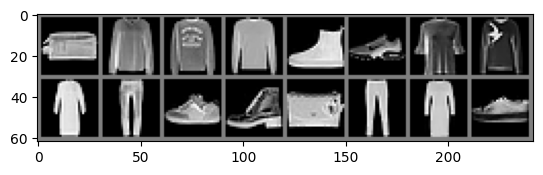

Bag -- Shirt -- Pullover -- Pullover -- Ankle boot -- Sneaker -- T-shirt/top -- Pullover
Coat -- Trouser -- Sneaker -- Ankle boot -- Bag -- Trouser -- Dress -- Sneaker


In [34]:
# Función para desnormalizar y mostrar la imagen
def imshow(img):
    img = img/2 + 0.5  # Dessnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtener un lote (batch) de datos de entrenamiento
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Mostrar las imágenes junto con sus etiquetas
imshow(torchvision.utils.make_grid(images[:16]));
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8)))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8,16)))

Con el conjunto de datos cargado y el DataLoader creado, ahora se puede  entrenar nuestra red neuronal utilizando el conjunto de datos FashionMNIST. Modifiquemos nuestro ejemplo anterior de SimpleNet para manejar imágenes de 28x28 y 10 clases de salida.

## 6.&nbsp;Entrenamiento

In [35]:
import torch.nn.functional as F

In [ ]:
# Definir la red neuronal para FashionMNIST
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Crear una instancia de la red neuronal
net = FashionMNISTNet()
print(net)

### 6.1. Entrenamiento en CPU

El entrenamiento en la CPU por lo general es lento.

In [ ]:
# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [36]:
# Entrenar la red neuronal usando el dataset de FashionMNIST
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        # Hacer cero los gradientes
        optimizer.zero_grad()

        # Paso hacia adelante (forward)
        outputs = net(inputs)

        # Cálculo de la pérdida
        loss = criterion(outputs, labels)

        # Paso hacia atrás (backward)
        loss.backward()
        optimizer.step()

        # Actualizar la pérdida actual
        running_loss += loss.item()

    # Mostrar la pérdida promedio para esta época
    avg_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

print("Entrenamiento terminado.")

FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/5], Loss: 1.8323
Epoch [2/5], Loss: 0.6826
Epoch [3/5], Loss: 0.5675
Epoch [4/5], Loss: 0.5037
Epoch [5/5], Loss: 0.4623
Training finished.


###  6.2. Entrenamiento en la GPU

El entrenamiento en la GPU suele ser mucho más rápido

In [39]:
# Verificar si hay alguna GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Usando el dispositivo:", device)

Usando el dispositivo: cuda


In [40]:
# Mover el modelo a la GPU, si está disponible
net.to(device)

FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [41]:
# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Entrenar la red neuronal usando el dataset FashionMNIST
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):

        # Mover las entradas y etiquetas a la GPU, si está disponible
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Hacer cero los gradientes
        optimizer.zero_grad()

        # Paso hacia adelante (forward)
        outputs = net(inputs)

        # Cálculo de la pérdida
        loss = criterion(outputs, labels)

        # Paso hacia atrás (backward)
        loss.backward()
        optimizer.step()

        # Actualizar la función de pérdida
        running_loss += loss.item()

    # Mostrar el promedio de pérdida para esta época (epoch)
    avg_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

print("Training finished.")

Epoch [1/5], Loss: 0.4336
Epoch [2/5], Loss: 0.4038
Epoch [3/5], Loss: 0.3827
Epoch [4/5], Loss: 0.3652
Epoch [5/5], Loss: 0.3476
Training finished.


### 6.3. Evaluación

Luego de entrenar la red neuronal, se puede evaluarsu desempeño en el conjunto de datos de prueba.

In [42]:
# Indicar que se utilizará el modelo en modo evaluación
net.eval()

FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [43]:
correct = 0
total = 0

# Desactivar el cálculo de la gradiente
with torch.no_grad():
    for inputs, labels in test_loader:

        # Mover las entradas y etiquetas a la GPU, si está disponible
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Paso hacia adelante (forward)
        outputs = net(inputs)

        # Obtener la clase predicha
        _, predicted = torch.max(outputs.data, 1)

        # Actualizar el número total de instancias y predicciones correctas
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calcular la exactitud (accuracy)
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 86.48%


Número total de parámetros y parámetros de entrenamiento en el modelo:

In [44]:
total_params = sum(p.numel() for p in net.parameters())
print(f'{total_params:,} parámetros totales.')

total_trainable_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} parámetros entrenables.')

116,234 parámetros totales.
116,234 parámetros entrenables.


### 6.4. Congelamiento de capas

Luego de tener un modelo entrenado, si se desea adaptar el modelo a otro conjunto de datos con solo 5 clases, se puede congelar las capas anteriores y entrenar solo en la última capa completamente conectada.

In [45]:
# Congeler capas previas
for param in net.parameters():
    param.requires_grad = False

n_inputs = net.fc3.in_features
n_classes = 5
net.fc3 = nn.Linear(n_inputs, n_classes)
total_params = sum(p.numel() for p in net.parameters())
print(f'{total_params:,} Parámetros totales.')

total_trainable_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} parámetros entrenables.')

115,909 Parámetros totales.
325 parámetros entrenables.


## 7.&nbsp;Uso de pesos previamente entrenados

PyTorch tiene muchos modelos previamente entrenados que se puede usar. Todos estos modelos han sido entrenados en `Imagenet`, que consta de millones de imágenes en 1000 categorías. Se desea congelar las primeras capas de estos modelos previamente entrenados y reemplazar el módulo de clasificación por uno nuevo (ver [API de PyTorch](https://pytorch.org/vision/stable/models.html))

El enfoque para utilizar un modelo de reconocimiento de imágenes previamente entrenado es el siguiente:

1. Cargar los pesos previamente entrenados desde una red entrenada en un gran conjunto de datos
2. Congelar todos los pesos en las capas inferiores (convolucionales).  Las capas a congelar se pueden ajustar según la similitud de la tarea con un gran conjunto de datos de entrenamiento
3. Reemplazar la parte del clasificador (completamente conectada) de la red con un clasificador personalizado. El número de salidas debe ser igual al número de clases.
4. Entrenar solo las capas del clasificador personalizado (totalmente conectado) para la tarea. Clasificador de modelo optimizador para conjuntos de datos más pequeños

A continuación se muestra un ejemplo de carga de un modelo Resnet previamente entrenado.

In [46]:
from torchvision import models

In [50]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 75.3MB/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [51]:
for param in model.parameters():
    param.requires_grad = False

n_inputs = model.fc.in_features
model.fc = nn.Sequential(nn.Linear(n_inputs, 256),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(256, n_classes),
                         nn.LogSoftmax(dim=1))